# **plottting the codon usage found in the genome vs arrived to in the simulation**

In [1]:
library(dplyr)
library(ggplot2)

Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
genome_codonUsage <- read.csv("generating_codon_usage_bias_data/codon_usage_df_2022_01_02.csv",stringsAsFactors=FALSE)

In [3]:
colnames(genome_codonUsage)[1] <- "codon"

In [4]:
head(genome_codonUsage)

codon,AA,codon_usage
TGT,CYS,0.84
TGC,CYS,1.00
GAT,ASP,0.86
GAC,ASP,1.00
TCT,SER,0.77
TCG,SER,0.23


In [5]:
sim_codonUsage <- read.csv("data/redo_multDif_exons_2021_02_07/2022_01_02_codonUsage_multCds.csv",stringsAsFactors=FALSE)
sim_codonUsage<-t(sim_codonUsage) #invert https://statisticsglobe.com/convert-row-names-into-column-of-data-frame-in-r
colnames(sim_codonUsage) <- sim_codonUsage[1,] #seeting col names fpr all the trial cols 
sim_codonUsage<-as.data.frame(sim_codonUsage)   # converting from atrix 9done by t function) to df 

sim_codonUsage$codon <- rownames(sim_codonUsage) # setting the colanme for the codon col 
sim_codonUsage<-sim_codonUsage[2:dim(sim_codonUsage)[1],] #removing first row (has the colnames)

In [6]:
sim_codonUsage[c(1:10)]<-apply(sim_codonUsage[c(1:10)],MARGIN=2,as.numeric)#geeting out of factors

In [7]:
sim_codonUsage$usage_mean <- rowMeans(sim_codonUsage[,1:10]) #naking the mean col 

In [8]:
data_combined<- (merge(genome_codonUsage,sim_codonUsage[,c("codon","usage_mean")],by="codon"))

In [9]:
head(data_combined)

codon,AA,codon_usage,usage_mean
AAA,LYS,0.77,1.0000000
AAC,ASN,1.00,0.8371102
AAG,LYS,1.00,0.8219270
AAT,ASN,0.89,1.0000000
ACA,THR,0.81,1.0000000
ACC,THR,1.00,0.5441759


Saving 6.67 x 6.67 in image


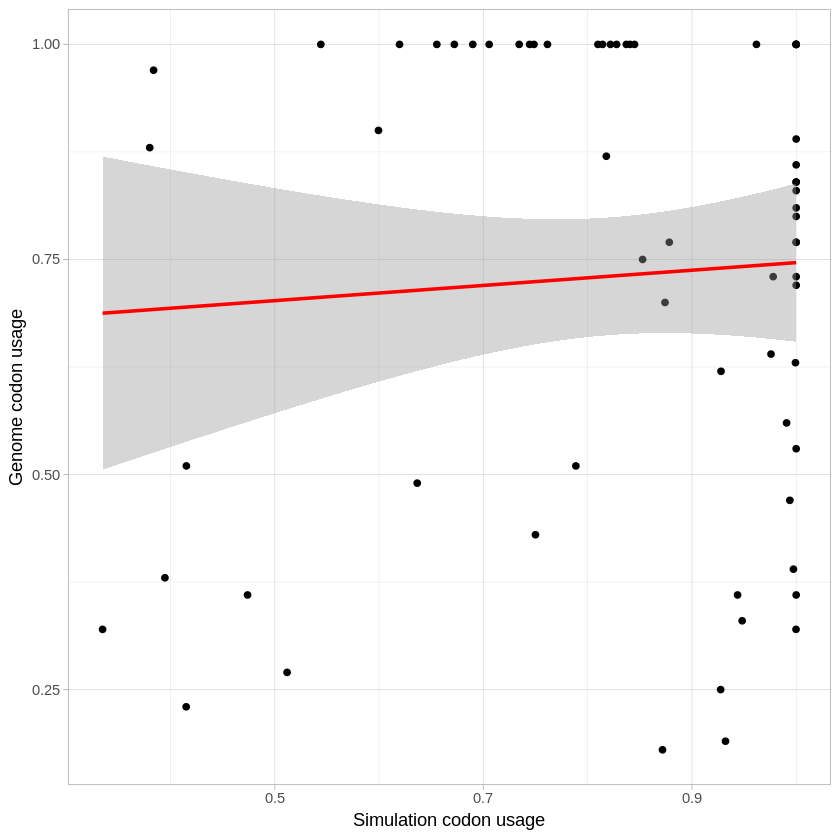

In [19]:
ggplot(data_combined,aes(x=usage_mean,y=codon_usage))+
    theme_light()+
    geom_point()+
    labs(x ="Simulation codon usage", y = "Genome codon usage")+
    stat_smooth(method="lm",formula=y~x, col = "red")
# ggsave("plots/Codon_usage_simulation_vs_genome_2022_01_04_regression.pdf")

In [16]:
summary(lm(data_combined$codon_usage~data_combined$usage_mean))


Call:
lm(formula = data_combined$codon_usage ~ data_combined$usage_mean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55500 -0.21930  0.05867  0.26783  0.29396 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.65796    0.14643   4.493 3.12e-05 ***
data_combined$usage_mean  0.08837    0.17313   0.510    0.612    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2738 on 62 degrees of freedom
Multiple R-squared:  0.004185,	Adjusted R-squared:  -0.01188 
F-statistic: 0.2605 on 1 and 62 DF,  p-value: 0.6116


In [106]:
sim_codonUsage[,c("codon","usage_mean")]

,codon,usage_mean
TGC,TGC,0.7056074
GCG,GCG,0.5118279
CGG,CGG,0.3838122
AGA,AGA,1.0000000
GTT,GTT,0.9973832
TTG,TTG,0.9998457
GTG,GTG,0.9619041
ATA,ATA,0.9437847
TAA,TAA,1.0000000
TGA,TGA,1.0000000
